In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [4]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [8]:
df = pd.read_csv("data/men_shoes.csv", low_memory=False)
df.shape

(18280, 48)

In [9]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [11]:
mean_price = np.mean( df['prices_amountmin'] )
mean_price

93.53952188183217

In [12]:
# rep in python
[1] * 5

[1, 1, 1, 1, 1]

In [21]:
# we are now comparing prediction based on just mean calculation:
y_true = df['prices_amountmin']
y_true.shape[0]

18280

In [0]:
y_pred = [mean_price] * y_true.shape[0]

In [26]:
mean_absolute_error(y_true, y_pred)

63.968341227870624

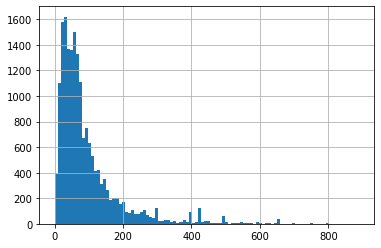

In [27]:
#check distribution
df['prices_amountmin'].hist(bins=100)

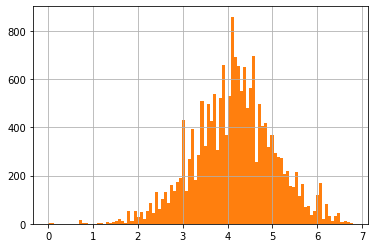

In [33]:
np.log( df['prices_amountmin'] + 1).hist(bins=100)
np.log1p( df['prices_amountmin']).hist(bins=100)

In [34]:
# another simple approach
y_pred = [np.median(y_true)] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.01120240700219

In [37]:
# use log transform
y_true = df['prices_amountmin']
# np.mean( np.log1p(y_true) )
# np.expm1( np.mean( np.log1p(y_true) ) )
price_log_mean = np.expm1( np.mean( np.log1p(y_true) ) )
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
# model
# coosing features
df.brand.value_counts()
df['brand'].factorize()[0] # array of numeric ID - ready new column

df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
# matrix
feats = ['brand_cat'] # list of features
x = df[feats].values
y = df['prices_amountmin'].values

In [0]:
model = DecisionTreeRegressor(max_depth=5)

In [49]:
scores = cross_val_score(model, x, y, scoring="neg_mean_absolute_error")
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
# make function

def run_model(feats):
  x = df[feats].values
  y = df['prices_amountmin'].values
  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model, x, y, scoring="neg_mean_absolute_error")
  return np.mean(scores), np.std(scores)

In [51]:
# check function
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [82]:
# more features
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [100]:
run_model(['brand_cat', 'manufacturer_cat'])

(-58.53930419908596, 4.31122323161543)

In [97]:
df['prices_merchant_cat'] = df['prices_merchant'].factorize()[0]
run_model(['prices_merchant_cat'])

(-59.22845673369132, 4.56377880226267)

In [111]:
run_model(['brand_cat', 'manufacturer_cat', 'prices_merchant_cat'])

(-58.335373528449324, 4.046981720465919)